In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pypianoroll
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
from music_generator.models import DivideAndCompose
from music_generator.midi import play_pianoroll, plot_pianoroll

2021-11-25 13:35:42.739096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-25 13:35:42.739112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
files = glob.glob('../**/*.npz', recursive=True)

In [5]:
multitracks = [pypianoroll.load(fp) for fp in files[0:10]]

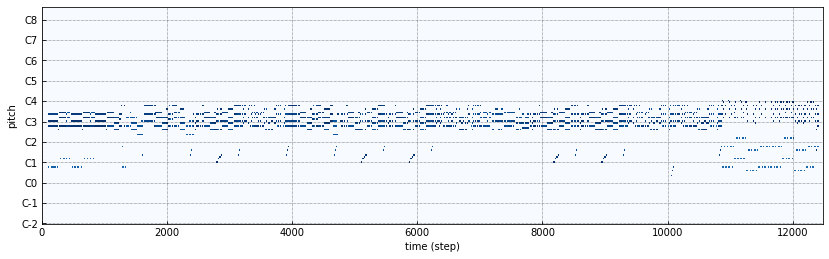

In [6]:
model = DivideAndCompose(multitracks[0], 'Piano')

In [7]:
model.init_model(quarter_notes_window=4)
model.fit(epochs=200)

2021-11-25 13:35:45.245447: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 13:35:45.245767: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-25 13:35:45.245836: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-25 13:35:45.245893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-25 13:35:45.245943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 96, 512)           328192    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 96, 512)           524800    
                                                                 
 dense (Dense)               (None, 96, 512)           262656    
                                                                 
 dense_1 (Dense)             (None, 96, 256)           131328    
                                                                 
 dense_2 (Dense)             (None, 96, 128)           32896     
                                                                 
Total params: 1,279,872
Trainable params: 1,279,872
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [=============================

4/4 [==============================] - 1s 162ms/step - loss: 132.9080 - val_loss: 156.9048
Epoch 70/200
4/4 [==============================] - 1s 157ms/step - loss: 149.3273 - val_loss: 141.5689
Epoch 71/200
4/4 [==============================] - 1s 154ms/step - loss: 155.8202 - val_loss: 122.2632
Epoch 72/200
4/4 [==============================] - 1s 151ms/step - loss: 142.7526 - val_loss: 158.6438
Epoch 73/200
4/4 [==============================] - 1s 157ms/step - loss: 139.3301 - val_loss: 126.4028
Epoch 74/200
4/4 [==============================] - 1s 148ms/step - loss: 147.5915 - val_loss: 135.0492
Epoch 75/200
4/4 [==============================] - 1s 149ms/step - loss: 137.6541 - val_loss: 154.0184
Epoch 76/200
4/4 [==============================] - 1s 137ms/step - loss: 141.3981 - val_loss: 177.3207
Epoch 77/200
4/4 [==============================] - 1s 137ms/step - loss: 157.2894 - val_loss: 129.9691
Epoch 78/200
4/4 [==============================] - 1s 143ms/step - loss: 128

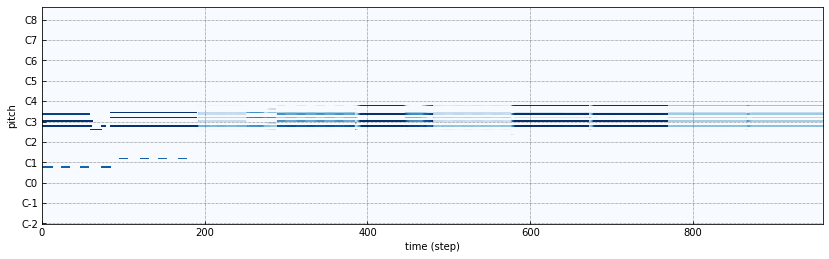

In [39]:
song = model.continueRoll(5, intro_roll=model.X[2:4])
model.plot(song)

In [40]:
model.play(song)

In [23]:
False is None

False

In [ ]:
song.to_pretty_midi().write('/tmp/song.midi')